# atoMEC

### Python-based average-atom code for simulations of high energy density phenomena such as in warm dense matter.

First we are going to start by importing some useful stuff.

In [ ]:
pip install matplotlib

In [1]:
from math import *
import numpy as np
import mendeleev
import matplotlib.pyplot as plt
from pylab import *
from atoMEC import Atom, models, config

Next we're going to set up the Atom and the model.

First you have to choose between Beryllium (by typing "Be" in the input box) and Iron (by typing "Fe"). Then the density [g*cm^-3], the temperature (we recommend using temperature values between 1e4 K and 1e6 K), and finally the boundary condition you want to use ("Neumann" or "Dirichlet").

In [6]:
should_restart1 = True
should_restart2 = True
while should_restart1:
    should_restart1 = False
    atom_species = input("Which atom do you want to simulate?: ")
    if atom_species in ["Be", "Fe"]:
        density = float(input("Density: "))
        temperature = float(input("Temperature: "))
        while should_restart2:
            should_restart2 = False
            boundary_condition = input("Which boundary condition do you want to use?: ").lower()
            if boundary_condition not in ["neumann", "dirichlet"]:
                print("Not a valid input")
                should_restart2 = True
            else:
                atom = Atom(atom_species, density=density, temp=temperature, units_temp="k")
                model = models.ISModel(atom, bc=boundary_condition)
                output = model.CalcEnergy(35, 5, grid_params={"ngrid": 1000})
                print("Total free energy = ", output["energy"].F_tot)
                F = output["energy"].F_tot
                orbs = output["orbitals"].eigvals
    else:
        print("Not a valid input")
        should_restart1 = True

Which atom do you want to simulate?: Be
Density: 20
Temperature: 1.74e5
Which boundary condition do you want to use?: neumann

Welcome to atoMEC! 

Atomic information:
 
Atomic species                : Be 
Atomic charge / weight        : 4   / 9.012
Mass density                  : 20 g cm^-3
Wigner-Seitz radius           : 1.067 Bohr / 0.5645 Angstrom
Electronic temperature        : 0.551 Ha /  14.99 eV / 1.74e+05 K


Using Ion-Sphere model
Ion-sphere model parameters: 
 
Spin-polarized                : False
Number of electrons           : 4
Exchange functional           : lda_x
Correlation functional        : lda_c_pw
Boundary condition            : neumann
Unbound electron treatment    : ideal


Starting SCF energy calculation
 
iscf   E_free (Ha)    dE (1.0e-05)   dn (1.0e-04)   dv (1.0e-04)
-----------------------------------------------------------------
   0    -10.0238790      1.000e+00      9.998e-01      1.000e+00
   1    -11.0346556      9.160e-02      1.749e-01      7.043e-

### Let's go further...

Now that you've seen a little how the code works and what is its output we'll do some plotting. For example, we'll plot the bounded orbital eigenvalues with respect to density to see how this affects the general output. To do that you'll have to choose a density interval (for example 10 to 100 in steps of 10).

In [5]:
should_restart1 = True
should_restart2 = True
while should_restart1:
    should_restart1 = False
    atom_species = input("Which atom do you want to simulate?: ")
    if atom_species in ["Be", "Fe"]:
        density1 = float(input("Density start: "))
        density2 = float(input("Density stop: "))
        step = int(input("Step size: "))
        temperature = float(input("Temperature: "))
        while should_restart2:
            should_restart2 = False
            boundary_condition = input("Which boundary condition do you want to use?: ").lower()
            if boundary_condition not in ["neumann", "dirichlet"]:
                print("Not a valid input")
                should_restart2 = True
            else:
                print("Welcome to atoMEC! Please wait patiently until the calculation is done (it may take a while).")
                eigval = np.zeros((4, int(((density2 - density1)/step) + 1)))
                n = 0
                for i in arange(density1, density2 + 1, step):
                    atom = Atom(atom_species, density=i, temp=temperature, units_temp="k", write_info=False)
                    model = models.ISModel(atom, bc=boundary_condition, write_info=False)
                    output = model.CalcEnergy(35, 5, grid_params={"ngrid": 1000}, write_info=False)
                    F = output["energy"].F_tot
                    orbs = output["orbitals"].eigvals
                    eigval[0, n] = orbs[0, 0, 0]
                    eigval[1, n] = orbs[0, 0, 1]
                    eigval[2, n] = orbs[0, 1, 0]
                    eigval[3, n] = orbs[0, 1, 1]
                    n = n + 1
                print("Done, now you can proceed with the plotting.")
    else:
        print("Not a valid input")
        should_restart1 = True

Which atom do you want to simulate?: Be
Density start: 10
Density stop: 49
Step size: 10
Temperature: 1.737e5
Which boundary condition do you want to use?: neumann
Welcome to atoMEC! Please wait patiently until the calculation is done (it may take a while).
Done, now you can proceed with the plotting.


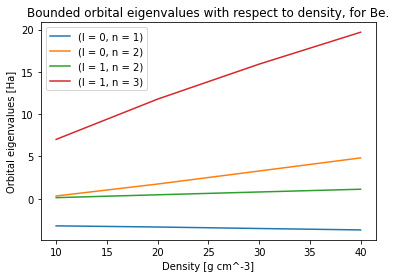

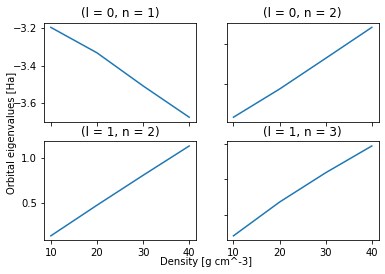

In [6]:
den = arange(density1, density2 + 1, step)
plt.figure(1)
plt.plot(den, eigval[0, :], label = "(l = 0, n = 1)"), plt.plot(den, eigval[1, :], label = "(l = 0, n = 2)"), plt.plot(den, eigval[2, :], label = "(l = 1, n = 2)"), plt.plot(den, eigval[3, :], label = "(l = 1, n = 3)")
plt.title("Bounded orbital eigenvalues with respect to density, for " + str(atom_species) + ".")
plt.ylabel("Orbital eigenvalues [Ha]"), plt.xlabel("Density [g cm^-3]")
plt.legend()
plt.show()

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(den, eigval[0, :])
axs[0, 0].set_title("(l = 0, n = 1)")
axs[0, 1].plot(den, eigval[1, :])
axs[0, 1].set_title("(l = 0, n = 2)")
axs[1, 0].plot(den, eigval[2, :])
axs[1, 0].set_title("(l = 1, n = 2)")
axs[1, 1].plot(den, eigval[3, :])
axs[1, 1].set_title("(l = 1, n = 3)")

fig.text(0.5, 0.04, "Density [g cm^-3]", ha='center')
fig.text(0.04, 0.5, "Orbital eigenvalues [Ha]", va='center', rotation='vertical')

#for ax in axs.flat:
 #   ax.set(xlabel="Density [g cm^-3]", ylabel="Orbital eigenvalues [Ha]")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### One last plot...

Now we are going to plot the density distribution with respect to radius and compare the result with both of the boundary conditions. You can choose between Beryllium and Iron like before. You can also choose the density and temperature.

Which atom do you want to simulate?: Be
Density: 20
Temperature: 1.737e5


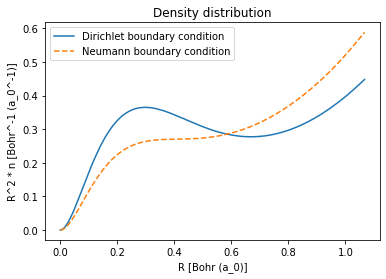

In [8]:
should_restart1 = True
while should_restart1:
    should_restart1 = False
    atom_species = input("Which atom do you want to simulate?: ")
    if atom_species in ["Be", "Fe"]:
        density = float(input("Density: "))
        temperature = float(input("Temperature: "))
        print("Please wait for the calculations to finish.")
        atom = Atom(atom_species, density=density, temp=temperature, units_temp="k", write_info=False)
        model = models.ISModel(atom, bc="dirichlet", write_info=False)
        output = model.CalcEnergy(35, 5, grid_params={"ngrid": 1000}, write_info=False)
        data = np.genfromtxt("density.csv", dtype=None, delimiter=' ', skip_header=1)
        plt.figure(1)
        plt.plot(data[:, 0], data[:, 0]**2*(data[:, 1] + data[:, 2]), label="Dirichlet boundary condition")
        model = models.ISModel(atom, bc="neumann", write_info=False)
        output = model.CalcEnergy(35, 5, grid_params={"ngrid": 1000}, write_info=False)
        data = np.genfromtxt("density.csv", dtype=None, delimiter=' ', skip_header=1)
        plt.plot(data[:, 0], data[:, 0]**2*(data[:, 1] + data[:, 2]), "--", label="Neumann boundary condition")
        plt.title("Density distribution")
        plt.xlabel("R [Bohr (a_0)]"), plt.ylabel("R^2 * n [Bohr^-1 (a_0^-1)]")
        plt.legend()
        plt.show()
    else:
        print("Not a valid input")
        should_restart1 = True